In [43]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

Get image

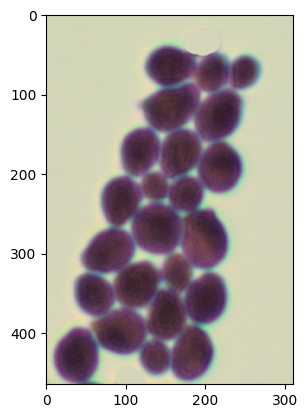

In [44]:
image_name = "./dataset/png/Candida.albicans_0004.png"
image = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)
plt.imshow(image)

Get grayscale image

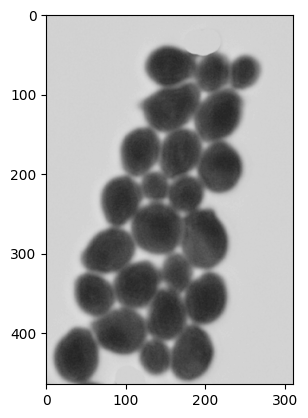

In [45]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)

OTSU binarisation

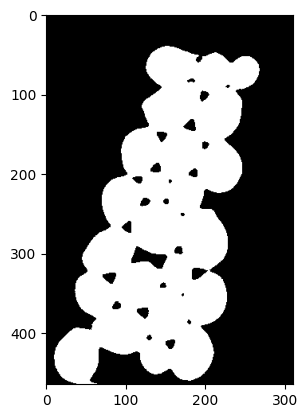

In [46]:
ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)

Erosions to try and separate a bit the images

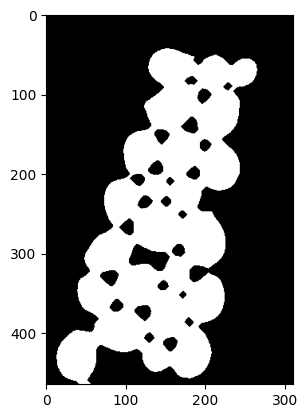

In [47]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
morphed_image = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, kernel, iterations=3)

plt.imshow(morphed_image, cmap='gray', vmin=0, vmax=255)

Canny - edge detection

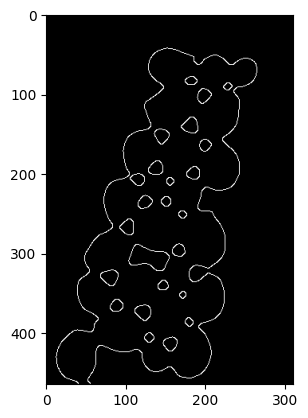

In [56]:
img_blur = cv2.GaussianBlur(morphed_image, (3,3), 0)
canny_img = cv2.Canny(img_blur, 0, 255)

plt.imshow(canny_img, cmap='gray', vmin=0, vmax=255)

Hough circle edge detection

In [49]:
RED_RGB = (220,20,60)
GREEN_RGB = (0,255,0)

In [53]:
circled_image = image.copy()

circles = cv2.HoughCircles(morphed_image, cv2.HOUGH_GRADIENT, 1, 1)

if not circles:
    print(f"No circles detected")
else:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(circled_image,(i[0],i[1]),i[2], RED_RGB, 2)
        # draw the center of the circle
        cv2.circle(circled_image,(i[0],i[1]),2, GREEN_RGB, 3)
    plt.imshow(circled_image)

No circles detected


Find contours

Number of Contours found = 25


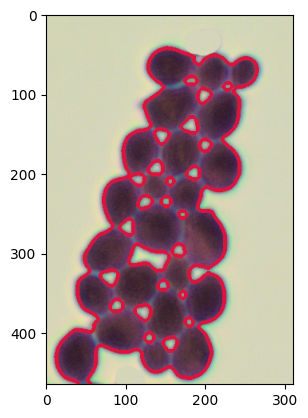

In [51]:
contours, hierarchy = cv2.findContours(canny_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contoured_image = image.copy()

cv2.drawContours(image, contours, -1, RED_RGB, 3)
plt.imshow(image)
print("Number of Contours found = " + str(len(contours)))